# Who tweets a lot? is it news medias? celebrities or polticians?

## 50 chosen people and organization are used for this visualization

In [1]:
# importing dependencies 
import tweepy
import json
import pandas as pd
from pprint import pprint

In [2]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# autorizing tweeter 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [4]:
# Usin pandas data frame and read a list of known people and polticians
df = pd.read_csv("../../GWDC201805DATA3-Class-Repository-DATA/07-Social-Analytics/1/Activities/05-Stu_Popular_Users/Resources/PopularAccounts.csv")

In [5]:
#check the data type on the data frame
df.dtypes

Screen Name         object
Real Name          float64
Tweets             float64
Followers          float64
Following          float64
Favorites Count    float64
dtype: object

In [6]:
#Check the length of our data
len(df)

50

In [7]:
# change the data type of of the real name from float to object
df["Real Name"] = pd.Series(df["Real Name"], dtype= str)

In [8]:
df.dtypes

Screen Name         object
Real Name           object
Tweets             float64
Followers          float64
Following          float64
Favorites Count    float64
dtype: object

In [9]:
#Using itter rows to loop around the data and fill the spaces with the necessary data from tweeter
for index, row in df.iterrows():
    try:
        target = row[0]
        tweeter = api.user_timeline(target)
        name = tweeter[0]["user"]["name"]
        tweet = tweeter[0]["user"]["statuses_count"]
        followers = tweeter[0]["user"]["followers_count"]
        friends = tweeter[0]["user"]["friends_count"]
        favourites = tweeter[0]["user"]["favourites_count"]
        
        df.at[index, "Real Name"] = name
        df.at[index, "Tweets"] = tweet
        df.at[index, "Followers"] = followers
        df.at[index, "Following"] = friends
        df.at[index, "Favorites Count"] = favourites
        
    except tweepy.TweepError as e:
        print(f" There is an error in reading at {row['Screen Name']}\n The error was-- {e}")
        df.drop(labels = index, inplace = True)

 There is an error in reading at ddlovato
 The error was-- Not authorized.


In [10]:
# check the length of the final data
len(df)

49

In [11]:
#use the pandas head method to see the filled data frame
df.head(3)

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,10203.0,108316070.0,222.0,6844.0
1,justinbieber,Justin Bieber,30462.0,107411754.0,296421.0,3414.0
2,BarackObama,Barack Obama,15705.0,110890523.0,610112.0,11.0


## Draw some charts to visualize the datas collected from tweeter

In [12]:
# import other dependencies to visualize the data
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x_axis = np.arange(len(df["Real Name"]))
tick_location = [value for value in x_axis]

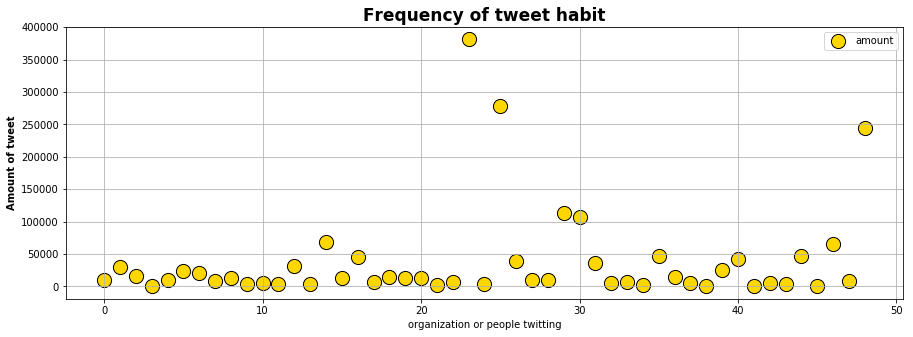

In [14]:
#plot a scatter plot 
fig= plt.figure(figsize=(15,5))
plt.scatter(x_axis, df["Tweets"],s= 200, marker = "o", color="gold", edgecolor = "k", label = "amount")
plt.ylabel("Amount of tweet", fontweight = "bold")
plt.title("Frequency of tweet habit", fontweight = "bold", fontsize = 17)
plt.xlabel("organization or people twitting")
plt.grid(axis=("both"))
plt.legend()

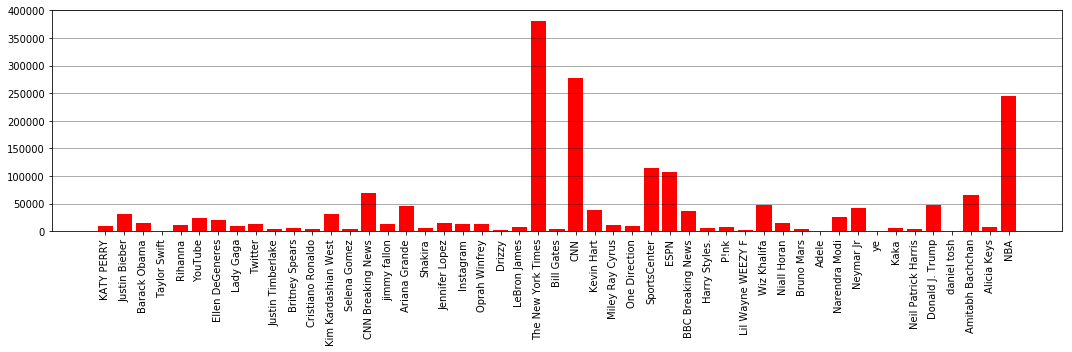

In [15]:
fig = plt.figure(figsize=(15,5))
plt.bar(x_axis, df["Tweets"], color="red")
plt.xticks(tick_location, df["Real Name"], rotation = 90)
plt.tight_layout()
plt.grid(axis=("y"), color = "k", alpha = 0.4)

# The answer to our question- It is the news medias who make the largest tweets

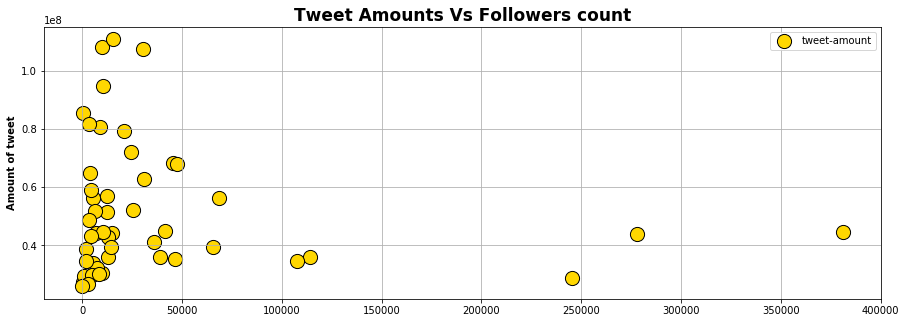

In [16]:
# view the relationship between tweets and followers count
fig= plt.figure(figsize=(15,5))
plt.scatter(df["Tweets"], df["Followers"],s= 200, marker = "o", color="gold", edgecolor = "k", label = "tweet-amount")
plt.ylabel("Amount of tweet", fontweight = "bold")
plt.title("Tweet Amounts Vs Followers count", fontweight = "bold", fontsize = 17)
plt.grid(axis=("both"))
plt.legend()

## check the largest tweeter- The New York Times tweets

In [17]:
df.loc[df["Real Name"] == "The New York Times", :]

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
24,nytimes,The New York Times,381143.0,44670104.0,899.0,18422.0


## bring hundred tweets , 20 /page , 25-pages, and investigate the time of tweets

In [18]:
target_user = "nytimes"
tweet_times = []

for x in range(1,26):
    public_tweet = api.user_timeline("nytimes", page = x)
    for tweet in public_tweet:
        tweet_time = tweet["created_at"]
        tweet_times.append(tweet_time)

In [19]:
len(tweet_times)

500

In [20]:
#import our depenecies to work with date time object
from datetime import datetime

In [21]:
# Use the string to time method and change the string to date time object
converted_times = []
for time in tweet_times:
    converted_time = datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y")
    converted_times.append(converted_time)


In [22]:
hours_btn = []
for x in range(len(converted_times)-1):
    time_delta = converted_times[x] - converted_times[x + 1]
    in_min = time_delta.seconds /3600
    hours_btn.append(in_min)
    
mean_time = np.mean(hours_btn)
print(mean_time)

print(f"Avg. Hours Between Tweets: {np.mean(hours_btn)}")

0.24515753729681586
Avg. Hours Between Tweets: 0.24515753729681586


## Average tweet between each tweet by NewYork Times = 0.25 Hours~ or  every 15 minutes

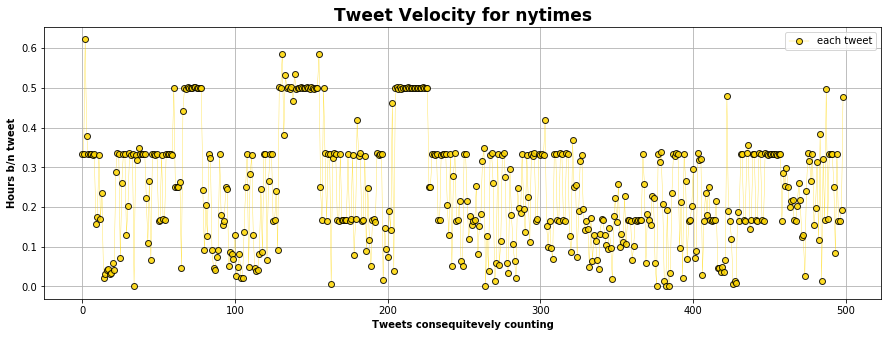

In [23]:
# plot between tweets by newyork times
fig= plt.figure(figsize=(15,5))
plt.plot(range(len(hours_btn)), hours_btn,  marker = "o", color="gold", markeredgecolor = "k",
         label = "each tweet", alpha = 0.85, linewidth = 0.35)
plt.ylabel("Hours b/n tweet", fontweight = "bold")
plt.title("Tweet Velocity for nytimes", fontweight = "bold", fontsize = 17)
plt.xlabel("Tweets consequitevely counting", fontweight = "bold")
plt.grid(axis=("both"))
plt.legend()